In [3]:
pip install yfinance

  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [19]:
import yfinance as yf, numpy as np, pandas as pd, datetime, statsmodels.api as sm, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
ticker = "^GSPC" #datos del Standard and Poor's 500
start= datetime.datetime(2015,1,1)
end= datetime.datetime(2023,1,1)
SP_precios=yf.download(ticker,start=start, end=end, interval="1mo").Close

[*********************100%***********************]  1 of 1 completed


Las series temporales tienen cuatro componentes: tendencia, estacionalidad, carácter cíclico y residualidad. Esto se puede analizar con *seasonal_decompose*.

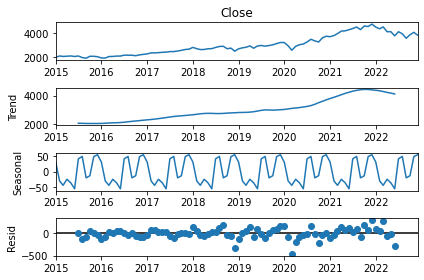

In [30]:
seasonal_decompose(SP_precios, period=12).plot() #usar la descomposición
#plt.savefig('images/decomposition.png')
plt.show()


### Tendencia: 
Indica el incremento o decremento durante un periodo. Hay tendencia cuando el inicio de la serie y su fin son diferentes.

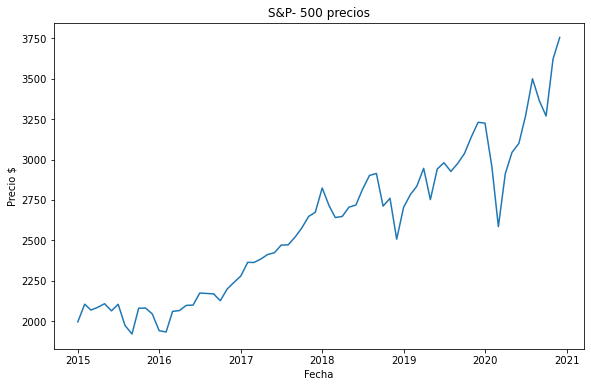

In [36]:
plt.figure(figsize=(9.5, 6))
plt.plot(SP_prices)
plt.title('S&P- 500 precios')
plt.ylabel('Precio $')
plt.xlabel('Fecha')
#plt.savefig('images/SP_price.png')
plt.show()


Notar que la serie de S&P-500 tiene tendencia alcista. Para analizar esta tendencia no es suficiente con trazar una línea de tendencia. Es posible ocupar recursos estadísticos:Función de Autocorrelación y Función Parcial de Autocorrelación.

**Función de Autocorrelación**: herramienta estadística para la relación entre los valores actuales y los *lagged* (atrasados) valores. Graficar la Función de Autocorrelación sirve para observar la dependencia entre en la serie de tiempo:

$$\rho(h)=\frac{Cov(X_{t},X_{t-h})}{Var(X_{t})}$$

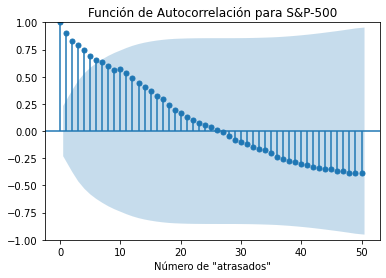

In [50]:
sm.graphics.tsa.plot_acf(SP_prices,lags=50)
plt.xlabel('Número de "atrasados"')
plt.title("Función de Autocorrelación para S&P-500")
#plt.savefig('images/acf_SP.png')
plt.show()

En la gráfica de la Función de Autocorrelación las líneas verticales muestran el coeficiente de correlación. La primera línea muestra la relación de la serie de tiempo con "0" atrasos, es decir, se correlaciona consigo mismo en el instante. La segunda línea muestra la relación en el tiempo *t* y *t-1*. Se puede concluir que si se consideran más valores atrasados, menos relación directa tendrá, incluso llega a tener correlación negativa.

**Función Parcial de Autocorrelación**: es otra herramienta estadística para examinar la dependencia entre las variables $X_{t}$ y $X_{t-p}$, $p \in \mathbb{Z}$. La diferencia con la Función de Autocorrelación es que la parcial no decae tan rápido y se aproxima a cero. La FdA es utilizada principalmente en los modelos de medias móviles; la FPdA es ocupada comunmente en los modelos autoregresivos.
Por ejemplo, para la Función Parcial de Autocorrelación entre $X_{t}$ y $X_{t-h}$, se toman en cuenta las correlaciones entre $X_{t}$ y $X_{t-1}$ y $X_{t-2}$. Matemáticamente:

$$p(h)=\frac{Cov(X_{t},X_{t-h}|X_{t-1},X_{t-2}\dots X_{t-h-1})}{\sqrt{Var(X_{t}|X_{t-1},X_{t-2}\dots X_{t-h-1})Var(X_{t-h}|X_{t-1},X_{t-2}\dots X_{t-h-1})}}$$

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


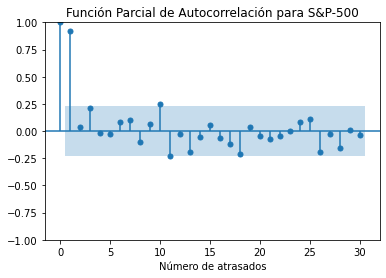

In [54]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Número de atrasados')
plt.title("Función Parcial de Autocorrelación para S&P-500")
#plt.savefig('images/pacf_SP.png')
plt.show()

Notar que hay un intervalo de confianza y durante el análisis de está función se analizan los valores que salen del intervalo. Por ejemplo, el valor atrasado 11 sale del intervalo. Por lo que es recomendable tomar un modelo con $11$ atrasados para analizar los mismos atrasados en este nuevo rango.

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


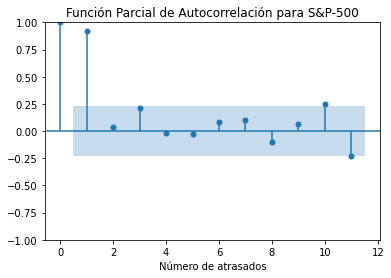

In [58]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=11)
plt.xlabel('Número de atrasados')
plt.title("Función Parcial de Autocorrelación para S&P-500")
#plt.savefig('images/pacf_SP.png')
plt.show()

### Estacionalidad:
Hay estacionalidad cuando hay fluctuaciones regulares dado un periodo de tiempo. Ver la estacionalidad de la serie de tiempo de S&P:





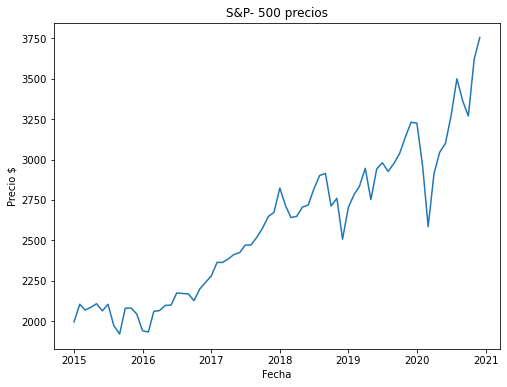

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(SP_prices)
plt.title('S&P- 500 precios')
plt.ylabel('Precio $')
plt.xlabel('Fecha')
#plt.savefig('images/SP_price.png')
plt.show()

Esta serie de tiempo no presenta fluctuaciones regulares durante el periodo de 6 años.



### Ciclicidad:
Ocurre cuando hay más variaciones periódicas que una tendencia. Se suele confundir con la estacionalidad, sin embargo, es importante señalar que una de las principales distinciones es que en la ciclicidad puede haber una fluctuación pero no en un periodo fijo, condición necesaria para la estacionalidad. Se puede pensar la ciclicidad como un ciclo económico. Por ejemplo, una serie de tiempo que modele los precios de una casa dada la tasa de interés es una serie cíclica porque no se sabe exactamente cuándo será el cambio pero se sabe (o se intuye) el comportamiento de la serie.
La serie de tiempo de S&P no muestra ciclidad en ese lapso pero sería relevante analizar con un rango de tiempo mayor para detectar posibles ciclos.

### Residualidad:
Se le conoce como el componente irregular de la serie de tiempo. Matemáticamente el residual es la diferencia entre las observaciones y los valores ajustados relacionados.